In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense, Flatten

In [2]:
tf.version.VERSION

'2.4.1'

In [3]:
if tf.test.gpu_device_name() == '':
    print("GPU is not used")
else:
    print("GPU is being used")

GPU is not used


# Load the data

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Shape of training data: (60000, 28, 28)
Shape of testing data: (10000, 28, 28)


In [6]:
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

X_train is a matrix representation of the image, since the shape is 28x28, we will have 28 pixels in each row and column. And since a channel is not specified (otherwise shape would be count_of_images x rows x columns x no_of_channels), it has only one channel, so a grayscale image. 

dtype=uint8 means each value is represented by 8bit data, with values ranging from 0 to 255. 0 indicates black, 255 indicates white, with other numbers represending the shades of grey.

In [7]:
print("Shape of training output:", y_train.shape)
print("Shape of testing output:", y_test.shape)

Shape of training output: (60000,)
Shape of testing output: (10000,)


In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Output is a 1D array, indicating the numbers which each element/image in X_train represents. This is the truth value.

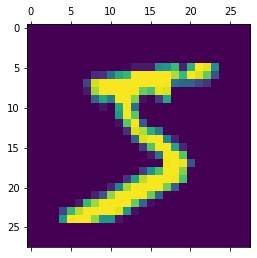

In [9]:
plt.matshow(X_train[0])
plt.show()

In [10]:
print("Number is :", y_train[0])

Number is : 5


Now, we have some understanding of what the input and output data represents

Let's check how many of each of the digits 0->9 are there in the training result, we need to have a well balanced set of each digits, so that the model is able to identify them right.

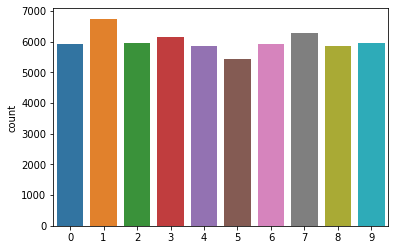

In [11]:
sns.countplot(y_train)
plt.show()

We have a good set of data of all the digits, proceeding on to building the model

# Building the model

Keras uses this class to allow us to add layers sequentially (intutively implementing the model similar to what we write on paper)

In [12]:
ourNN = keras.Sequential()

The input image is a 28x28 element, but the first layer (input layer) of our model represents data in a single row. So, we need to `reshape` the data.

2 ways to reshape.
1. Since the data is a numpy array, use reshape method
2. Add a layer called Flatten and let keras handle it. (Using this)

In [13]:
#Flatten layer to convert 28x28 pixels into a single row of 784 pixels
ourNN.add(keras.layers.Flatten(input_shape=(28, 28)))

**Note**: First layer of the sequential build needs to have the input_shape specified, the subsequent layers do not. keras can find that on it's own

Add the perceptrons that has the mesh connections to each input of previous layer, hence called "Dense"

In [14]:
#First param 100 - is the number of perceptrons we want in the layer
# activation funciton is how/when we want perceptron to activate
# relu function results as max(0, input)
ourNN.add(keras.layers.Dense(100, activation='relu'))

We will have only 1 hidden layer, since the model is a simple one, the last layer is the output layer, so it needs to give the results of the learning.

In [15]:
# Activation function softmax gives output as a probability of the input being any one of the output
# i.e the output will have 10 proabability values printed for each digit
ourNN.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
# Providing other details to keras on how the `learning` needs to be achieved. 
# The loss function tells the model on how to tell if it's wrong in learning and needs to learn more or if it's learning is getting good.
# Metrics=accuracy allows us to check how good our model has learnt 
ourNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Checking a textual version of the model, how many parameters needs to be learned
ourNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


We have 3 layers after input
1. Flatten - to convert the 2D input of 28x28 into a 1D input of 784 elements
2. Dense layer 1 - 100 perceptrons which will learn to make the classfication of the input image
3. Dense layer 2/output layer - 10 perceptrons to decide the probabilities of the input image into the 10 digits. Each perceptron represents one digit. (0->9)

In [18]:
#epochs = 5, would have the model run 5 times through all the layers, 
#  and tries to get better at each run (loss has to reduce and accuracy has to be imporving)
ourNN.fit(X_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 7.0024 - accuracy: 0.7907
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4410 - accuracy: 0.8878
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3014 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2629 - accuracy: 0.9299
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2374 - accuracy: 0.9377


We have an accuracy of 93.8% on our training data. It's time to evaluate how good the model can perform on unseen data or test data. Model is not to be touched for any tweaks from now. 

In [19]:
ourNN.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2659 - accuracy: 0.9341


[0.26589706540107727, 0.9340999722480774]

Our model is performing with an accuracy of 93.4% on unseen data too. This is an indication that the model is not overfit, meaning it's performance determined during training is likely to be the same for other unseen data.

Now, we can check how the output is reported and how to confirm if things are working fine. First, let's get the prediction results on a sample test data

In [20]:
#Since we passed our input as shape, count x image_height x image_row
# Need to replicate the same, hence reshaping input to (1,28,28) 
# since we are using only one sample image from test
sample_test = X_test[0]
sample_test = sample_test.reshape(1,28,28)
out = ourNN.predict(sample_test)

In [21]:
#Result will be a list of list of probabilities, the outer list is for inputs
out

array([[4.7528785e-18, 5.3643158e-16, 3.6169194e-09, 2.5557373e-08,
        2.3277420e-10, 3.2641851e-11, 0.0000000e+00, 9.9999797e-01,
        3.4371234e-10, 2.0813477e-06]], dtype=float32)

Each of the numbers is a probability that the input is one of the digits 0->9

<BarContainer object of 10 artists>

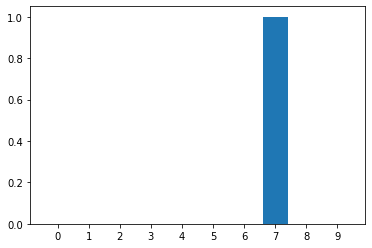

In [22]:
#Representing in the bar chart, passing out[0] to get the probability values for each digit
plt.bar(x=range(0,10), height=out[0], tick_label=range(0,10))

We can see from the probability values, the model guessed it is highly likely (probability of ~1) that the number is 7. Another way to get the result is to get the index of the result which has the highest probability.

In [23]:
pred = np.argmax(out[0])
pred

7

Let's check on what the input image really was.

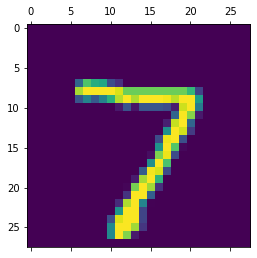

In [24]:
plt.matshow(X_test[0])
plt.show()

Yes!, the first element that we checked was predicted right. A better way of checking and comparing on how good or bad is the model on predicting each digit in the test data, is by creating a confusion matrix for the predictions on all the test data.

In [25]:
#Get predictions on all the test data
y_pred = ourNN.predict(X_test)

In [26]:
#Translate the probabilities in the prediction result into a digit
# The digit chosen is the one reporting the highest probabilities
y_pred_digit = [np.argmax(i) for i in y_pred]

In [27]:
# Tensorflow has functions, inputs are the test_data/truth, predicted_data
cm = tf.math.confusion_matrix(y_test, y_pred_digit)

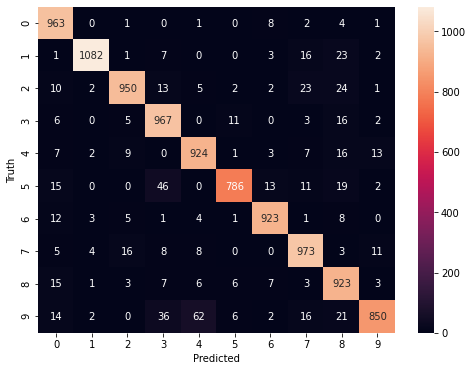

In [28]:
# Using a heatmap to see how good or bad our model is in predicting each digits
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Truth')
plt.show()

The diagonal of the heatmap is much brigther than the other cells, indicating that the number of times the digit was predicted right was much higher. Let us get the precision in terms of % for each digits.

In [29]:
#COunt of each digit in the test data
counts = np.unique(y_test, return_counts=True)
counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [30]:
precision = cm/counts[1]

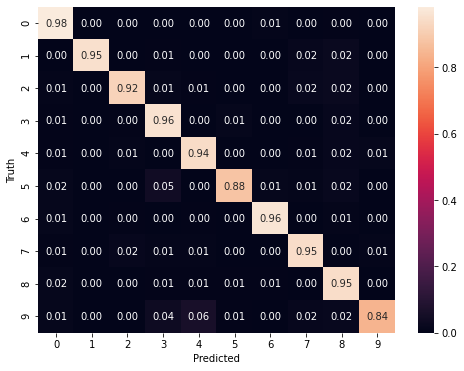

In [31]:
# Using a heatmap to see how good or bad our model is in predicting each digits
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(precision, annot=True, fmt='.2f', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Truth')
plt.show()

From the heatmap, the diagonal gives the precision prediction of each digit. The results of predicting 5 is the lowest and 0 has the best prediction precision.